# Module 1 Assignment 1: House Prices
## MDSD 422 
### Ana Chavez
### *Note to Professor: for this week I am submitting this assignment individually 

In [3]:
# for the remainder of this EDA I only downloaded the train.csv file from the Kaggle competition website


# import libraries to be used
import pandas as pd
import statistics
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# import dataset
df = pd.read_csv('train.csv',sep =",")

In [5]:
# verify import was successful
df.shape

df.info()

(1460, 81)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# from the above I can see that there are 81 fields in this dataset, so I will only select those that 
# I am hypothesizing will have the greatest predictive power based on my knowledge of the housing market


df2 = df[['SalePrice','LotArea','1stFlrSF','2ndFlrSF','TotalBsmtSF','FullBath','LandContour','Neighborhood','BldgType',
                                'OverallQual','OverallCond','YearBuilt','KitchenQual','PoolQC']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalePrice     1460 non-null   int64 
 1   LotArea       1460 non-null   int64 
 2   1stFlrSF      1460 non-null   int64 
 3   2ndFlrSF      1460 non-null   int64 
 4   TotalBsmtSF   1460 non-null   int64 
 5   FullBath      1460 non-null   int64 
 6   LandContour   1460 non-null   object
 7   Neighborhood  1460 non-null   object
 8   BldgType      1460 non-null   object
 9   OverallQual   1460 non-null   int64 
 10  OverallCond   1460 non-null   int64 
 11  YearBuilt     1460 non-null   int64 
 12  KitchenQual   1460 non-null   object
 13  PoolQC        7 non-null      object
dtypes: int64(9), object(5)
memory usage: 159.8+ KB


In [7]:
# next I want to see the summary statistics of the numeric variables I chose

columns_sum_stats = df2[['SalePrice','LotArea','1stFlrSF','2ndFlrSF','TotalBsmtSF']]

columns_sum_stats.describe()

,SalePrice,LotArea,1stFlrSF,2ndFlrSF,TotalBsmtSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,1162.626712,346.992466,1057.429452
std,79442.502883,9981.264932,386.587738,436.528436,438.705324
min,34900.000000,1300.000000,334.000000,0.000000,0.000000
25%,129975.000000,7553.500000,882.000000,0.000000,795.750000
50%,163000.000000,9478.500000,1087.000000,0.000000,991.500000
75%,214000.000000,11601.500000,1391.250000,728.000000,1298.250000
max,755000.000000,215245.000000,4692.000000,2065.000000,6110.000000


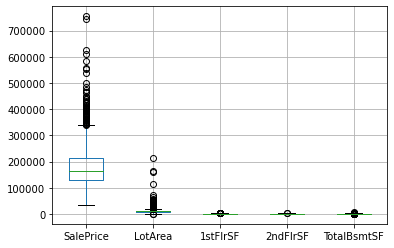

In [8]:
# to see this a little bit better I will visualize these in box plots

numeric_variables = columns_sum_stats.boxplot()

<AxesSubplot:>

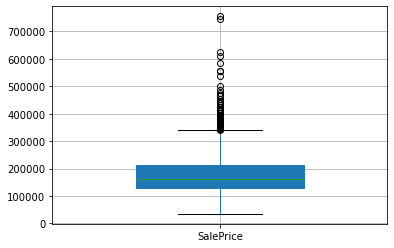

In [9]:
# the visualizations are not very clear since SalePrice and LotArea variables seems to have a much larger range than the other viariables
# so I will seperate it out in its own plot

saleprice_boxplot = df2.boxplot(column = 'SalePrice', widths = 0.5,patch_artist = True)
saleprice_boxplot

<AxesSubplot:>

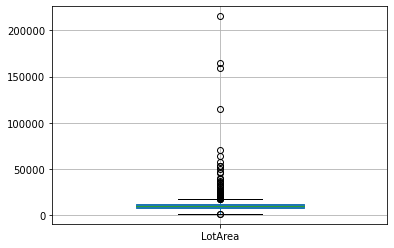

In [10]:
lotsize_boxplot = df2.boxplot(column = 'LotArea', widths = 0.5,patch_artist = True)
lotsize_boxplot

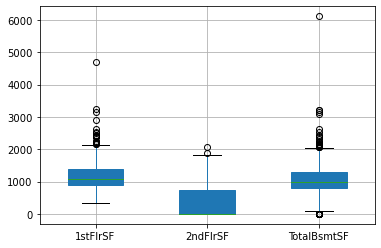

In [11]:
num_variables = df2[['1stFlrSF','2ndFlrSF','TotalBsmtSF']]
other_num_variables = num_variables.boxplot(widths = 0.5,patch_artist = True)

By looking at all the box plots we can see that the Sale price variable has a lot of outliers on the upper bound of the box and the same appleis for the LotArea variables as well (except for one observation). 

When it comes to looking at the distribution of the first and second floor size and total basement size they seem to have their distributions around the same range with the first floor size being slightly higher than the second floor size. But in general all 3 of these variables also have outliers on the upper bounds of their boxplots. 

<AxesSubplot:>

Text(0.5, 1.0, 'SalePrice, LotArea and 1st/2nd/Basement Size Correlations')

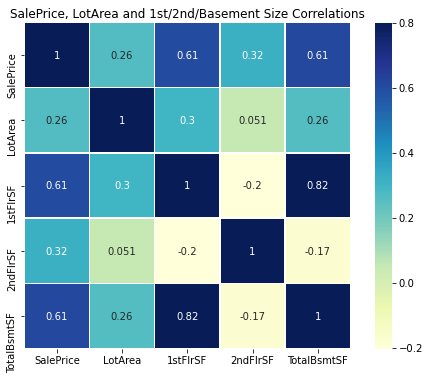

In [12]:
# next I want to see the correlation between each of these numberic variables 

corr_matrix = columns_sum_stats.corr()

# set the figure size
f, ax = plt.subplots(figsize=(9, 6))

sns.heatmap(corr_matrix, vmax = .8, square = True, annot = True, cmap = "YlGnBu", linewidths=.5)
plt.title('SalePrice, LotArea and 1st/2nd/Basement Size Correlations')

By looking at the above we can see that the 2 variables that have the highest correlation values with regards to Saleprice are 1st Floor size and Total basement size. I was suprised to see that LotArea was not the highest correlated value with SalePrice, since you would expect that the bigger the house is the mroe expensive it will be.

Since the variables 1st Floor size and Total basement size have the higest correlation to our target variable, I will compute the marginal distributions for each of these with regards to the SalePrice variable. 

For this I will create bins for each of these numeric variables first

array([[<AxesSubplot:title={'center':'1stFlrSF'}>]], dtype=object)

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

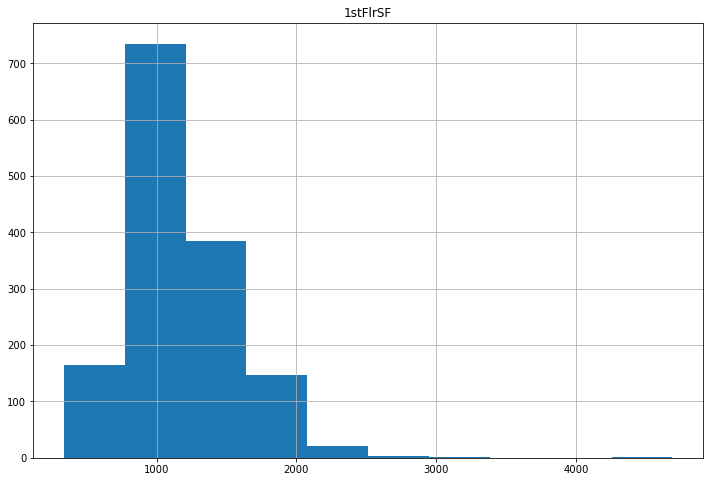

In [13]:
# create bins for 1stFlrSF variable
# first I will see what bin categories would make sense by looking at the distribution in detail

df2.hist('1stFlrSF', bins = 10, figsize=(12,8))

df2['1stFlrSF'].describe()

Based on the distribution I will bin this variable to have buckets per each 500 sq ft

In [14]:
# create another copy of original df
df3 = df2

df3.loc[df['1stFlrSF'].between(334,834, 'right'), 'First_Floor_Sq_FT_Range'] = '(334-834)'
df3.loc[df['1stFlrSF'].between(835,1335 , 'both'), 'First_Floor_Sq_FT_Range'] = '(835-1335)'
df3.loc[df['1stFlrSF'].between(1336,1836, 'both'), 'First_Floor_Sq_FT_Range'] = '(1336-1836)'
df3.loc[df['1stFlrSF'].between(1837,2337, 'both'), 'First_Floor_Sq_FT_Range'] = '(1837-2337)'
df3.loc[df['1stFlrSF'].between(2338,2838, 'both'), 'First_Floor_Sq_FT_Range'] = '(2338-2838)'
df3.loc[df['1stFlrSF'].between(2839,3339, 'both'), 'First_Floor_Sq_FT_Range'] = '(2839-3339)'
df3.loc[df['1stFlrSF'].between(3340,3840, 'both'), 'First_Floor_Sq_FT_Range'] = '(3340-3840)'
df3.loc[df['1stFlrSF'].between(3841,4341, 'both'), 'First_Floor_Sq_FT_Range'] = '(3841-4341)'
df3.loc[df['1stFlrSF'].between(4342,4692, 'left'), 'First_Floor_Sq_FT_Range'] = '(4342-4692)'

C:\Users\anari\Documents\Python-Anaconda\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\anari\Documents\Python-Anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\anari\Documents\Python-Anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [15]:
# here we see the new column with the count of homes based on their 1st floor sq ft values
df3['First_Floor_Sq_FT_Range'].value_counts()

(835-1335)     772
(1336-1836)    349
(334-834)      268
(1837-2337)     59
(2338-2838)      8
(2839-3339)      3
(4342-4692)      1
Name: First_Floor_Sq_FT_Range, dtype: int64

array([[<AxesSubplot:title={'center':'TotalBsmtSF'}>]], dtype=object)

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

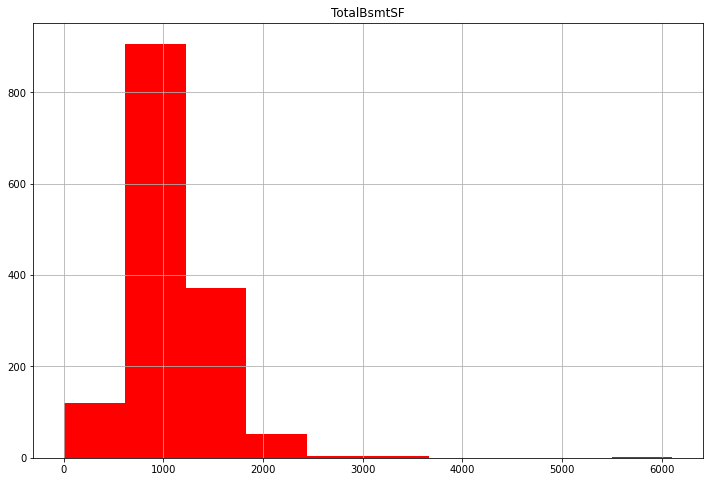

In [16]:
# I will do the same for the TotalBsmtSF field

df3.hist('TotalBsmtSF', bins = 10, figsize=(12,8), color = 'red')

df3['TotalBsmtSF'].describe()

In [17]:
# bin TotalBsmtSF

df3.loc[df['TotalBsmtSF'].between(0,500, 'right'), 'Basement_Sq_FT_Range'] = '(0-500)'
df3.loc[df['TotalBsmtSF'].between(501,1001 , 'both'), 'Basement_Sq_FT_Range'] = '(501-1001)'
df3.loc[df['TotalBsmtSF'].between(1002,1502, 'both'), 'Basement_Sq_FT_Range'] = '(1002-1502)'
df3.loc[df['TotalBsmtSF'].between(1503,2003, 'both'), 'Basement_Sq_FT_Range'] = '(1503-2003)'
df3.loc[df['TotalBsmtSF'].between(2004,2504, 'both'), 'Basement_Sq_FT_Range'] = '(2004-2504)'
df3.loc[df['TotalBsmtSF'].between(2505,3005, 'both'), 'Basement_Sq_FT_Range'] = '(2505-3005)'
df3.loc[df['TotalBsmtSF'].between(3006,3506, 'both'), 'Basement_Sq_FT_Range'] = '(3006-3506)'
df3.loc[df['TotalBsmtSF'].between(3507,4007, 'both'), 'Basement_Sq_FT_Range'] = '(3507-4007)'
df3.loc[df['TotalBsmtSF'].between(4008,4508, 'both'), 'Basement_Sq_FT_Range'] = '(4008-4508)'
df3.loc[df['TotalBsmtSF'].between(4509,5009, 'both'), 'Basement_Sq_FT_Range'] = '(4509-5009)'
df3.loc[df['TotalBsmtSF'].between(5010,5510, 'both'), 'Basement_Sq_FT_Range'] = '(5010-5510)'
df3.loc[df['TotalBsmtSF'].between(5511,6110, 'left'), 'Basement_Sq_FT_Range'] = '(5511-6110)'

C:\Users\anari\Documents\Python-Anaconda\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\anari\Documents\Python-Anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\anari\Documents\Python-Anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [18]:
df3['Basement_Sq_FT_Range'].value_counts()

(501-1001)     673
(1002-1502)    516
(1503-2003)    171
(0-500)         71
(2004-2504)     22
(3006-3506)      4
(2505-3005)      2
(5511-6110)      1
Name: Basement_Sq_FT_Range, dtype: int64

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

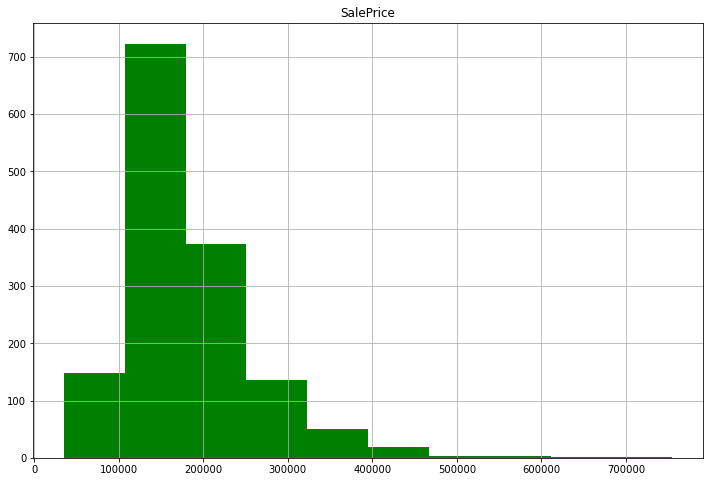

In [19]:
# lastly I will bin the SalePrice variable the same way
df3.hist('SalePrice', bins = 10, figsize=(12,8), color = 'green')

df3['SalePrice'].describe()

In [20]:
# bin SalePrice

df3.loc[df['SalePrice'].between(34900,124900, 'right'), 'Sales_Price_Range'] = '(34900-124900)'
df3.loc[df['SalePrice'].between(124901, 214901, 'both'), 'Sales_Price_Range'] = '(124901-214901)'
df3.loc[df['SalePrice'].between(214902,304902, 'both'), 'Sales_Price_Range'] = '(214902-304902)'
df3.loc[df['SalePrice'].between(304903,394903, 'both'), 'Sales_Price_Range'] = '(304903-394903)'
df3.loc[df['SalePrice'].between(394904,484904, 'both'), 'Sales_Price_Range'] = '(394904-484904)'
df3.loc[df['SalePrice'].between(484905,574905, 'both'), 'Sales_Price_Range'] = '(484905-574905)'
df3.loc[df['SalePrice'].between(574906,664906, 'both'), 'Sales_Price_Range'] = '(574906-664906)'
df3.loc[df['SalePrice'].between(664907,755000, 'both'), 'Sales_Price_Range'] = '(664907-755000)'


C:\Users\anari\Documents\Python-Anaconda\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\anari\Documents\Python-Anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\anari\Documents\Python-Anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [21]:
df3['Sales_Price_Range'].value_counts()

(124901-214901)    799
(34900-124900)     301
(214902-304902)    250
(304903-394903)     80
(394904-484904)     20
(484905-574905)      5
(574906-664906)      3
(664907-755000)      2
Name: Sales_Price_Range, dtype: int64

In [22]:
marg_dist_price_basement = pd.crosstab(df3['Sales_Price_Range'],df3['Basement_Sq_FT_Range'], margins = True,margins_name="Total")

In [23]:
marg_dist_price_basement

Basement_Sq_FT_Range,(0-500),(1002-1502),(1503-2003),(2004-2504),(2505-3005),(3006-3506),(501-1001),(5511-6110),Total
Sales_Price_Range,,,,,,,,,
(124901-214901),19,330,43,2,0,1,403,1,799
(214902-304902),0,115,73,5,1,1,55,0,250
(304903-394903),0,31,39,6,0,0,4,0,80
(34900-124900),52,35,3,0,0,0,211,0,301
(394904-484904),0,5,8,5,1,1,0,0,20
(484905-574905),0,0,3,1,0,1,0,0,5
(574906-664906),0,0,2,1,0,0,0,0,3
(664907-755000),0,0,0,2,0,0,0,0,2
Total,71,516,171,22,2,4,673,1,1460


In [24]:
# now I will find the marginal distribution of each price bin relative to the total

marg_dist_price_basement['Total']/1460


Sales_Price_Range
(124901-214901)    0.547260
(214902-304902)    0.171233
(304903-394903)    0.054795
(34900-124900)     0.206164
(394904-484904)    0.013699
(484905-574905)    0.003425
(574906-664906)    0.002055
(664907-755000)    0.001370
Total              1.000000
Name: Total, dtype: float64

In [25]:
# now I will find the marginal distribution of each basement size bin relative to the total

marg_dist_price_basement.iloc[-1]/1460

Basement_Sq_FT_Range
(0-500)        0.048630
(1002-1502)    0.353425
(1503-2003)    0.117123
(2004-2504)    0.015068
(2505-3005)    0.001370
(3006-3506)    0.002740
(501-1001)     0.460959
(5511-6110)    0.000685
Total          1.000000
Name: Total, dtype: float64

Now I will repeat the same process but compare First Floor size to SalePrice to get the marginal distribution

In [26]:
marg_dist_price_firstFloorSize = pd.crosstab(df3['Sales_Price_Range'],df3['First_Floor_Sq_FT_Range'], margins = True,margins_name="Total")

In [27]:
marg_dist_price_firstFloorSize

First_Floor_Sq_FT_Range,(1336-1836),(1837-2337),(2338-2838),(2839-3339),(334-834),(4342-4692),(835-1335),Total
Sales_Price_Range,,,,,,,,
(124901-214901),168,8,1,1,140,1,480,799
(214902-304902),116,17,1,1,7,0,108,250
(304903-394903),38,22,1,0,0,0,19,80
(34900-124900),15,0,0,0,121,0,165,301
(394904-484904),9,9,1,1,0,0,0,20
(484905-574905),1,3,1,0,0,0,0,5
(574906-664906),2,0,1,0,0,0,0,3
(664907-755000),0,0,2,0,0,0,0,2
Total,349,59,8,3,268,1,772,1460


In [28]:
# now I will find the marginal distribution of each first floor size bin relative to the total

marg_dist_price_firstFloorSize.iloc[-1]/1460

First_Floor_Sq_FT_Range
(1336-1836)    0.239041
(1837-2337)    0.040411
(2338-2838)    0.005479
(2839-3339)    0.002055
(334-834)      0.183562
(4342-4692)    0.000685
(835-1335)     0.528767
Total          1.000000
Name: Total, dtype: float64

Up to this point I have seen that for the numeric variables I chose in my subset, first floor size and basement size have a strong correlation to SalesPrice. 

For the first floor size variable 52% percent of our observations have a first floor size of (835-1335) and out of those ~52% 
, 62% of those observations have a price range of (124901-214901). 

As to the basement size variable aroundn 46% of our observations have a basement size of (501-1001) and out of those 46%, 59% have a price range of (124901-214901). 

Which is interesting to see that for both of these variables the majority of the homes in this data have that same price range.

Next I want to see how the categorical variables correlate to the Sale price variable by once again creating a correlation heatmap table

<AxesSubplot:>

Text(0.5, 1.0, 'SalePrice, and other Categorical Variables Correlations')

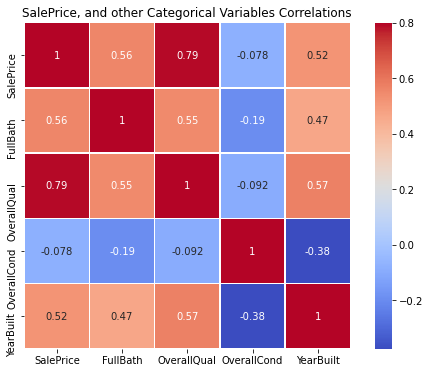

In [29]:
categorical_columns = df2[['SalePrice','FullBath','LandContour','Neighborhood','BldgType',
                                'OverallQual','OverallCond','YearBuilt','KitchenQual','PoolQC']]

corr_matrix2 = categorical_columns.corr()

# set the figure size
f, ax = plt.subplots(figsize=(9, 6))

sns.heatmap(corr_matrix2, vmax = .8, square = True, annot = True, cmap = "coolwarm", linewidths=.5)
plt.title('SalePrice, and other Categorical Variables Correlations')

By looking at the heatmap above I can see that the Overall quality variable has a very strong correlation to sales price. So I will I wil compute the marginal distribution for it with regards to Sales Price as well.

In [30]:
# Overall Quality marginal distribution
marg_dist_price_overallQual = pd.crosstab(df3['Sales_Price_Range'],df3['OverallQual'], margins = True,margins_name="Total")

In [31]:
marg_dist_price_overallQual

OverallQual,1,2,3,4,5,6,7,8,9,10,Total
Sales_Price_Range,,,,,,,,,,,
(124901-214901),0,0,2,29,257,292,194,23,0,2,799
(214902-304902),0,0,0,1,5,29,111,99,5,0,250
(304903-394903),0,0,0,0,0,0,11,36,28,5,80
(34900-124900),2,3,18,86,135,53,3,1,0,0,301
(394904-484904),0,0,0,0,0,0,0,8,5,7,20
(484905-574905),0,0,0,0,0,0,0,1,3,1,5
(574906-664906),0,0,0,0,0,0,0,0,2,1,3
(664907-755000),0,0,0,0,0,0,0,0,0,2,2
Total,2,3,20,116,397,374,319,168,43,18,1460


In [32]:
# now I will find the marginal distribution of each overall quality rating relative to the total

marg_dist_price_overallQual.iloc[-1]/1460

OverallQual
1        0.001370
2        0.002055
3        0.013699
4        0.079452
5        0.271918
6        0.256164
7        0.218493
8        0.115068
9        0.029452
10       0.012329
Total    1.000000
Name: Total, dtype: float64

By looking at the above we can see that most homes in this data have an overall quality rating of either 5 or 6 and the vast majority of these homes with these rating have a price range of (124901-214901), same as the other numeric variables I explored above. So it could be said at this point that msot homes in our data will be at (124901-214901) price range if they have an overall quality score of 5 or 6, have a first floor size of (835-1335) and a basement size of (501-1001).

In [33]:
# Full bath marginal distribution
marg_dist_price_fullBath = pd.crosstab(df3['Sales_Price_Range'],df3['FullBath'], margins = True,margins_name="Total")

In [34]:
marg_dist_price_fullBath.iloc[-1]/1460

FullBath
0        0.006164
1        0.445205
2        0.526027
3        0.022603
Total    1.000000
Name: Total, dtype: float64

Summarizing the correlations of all the variables in my subset

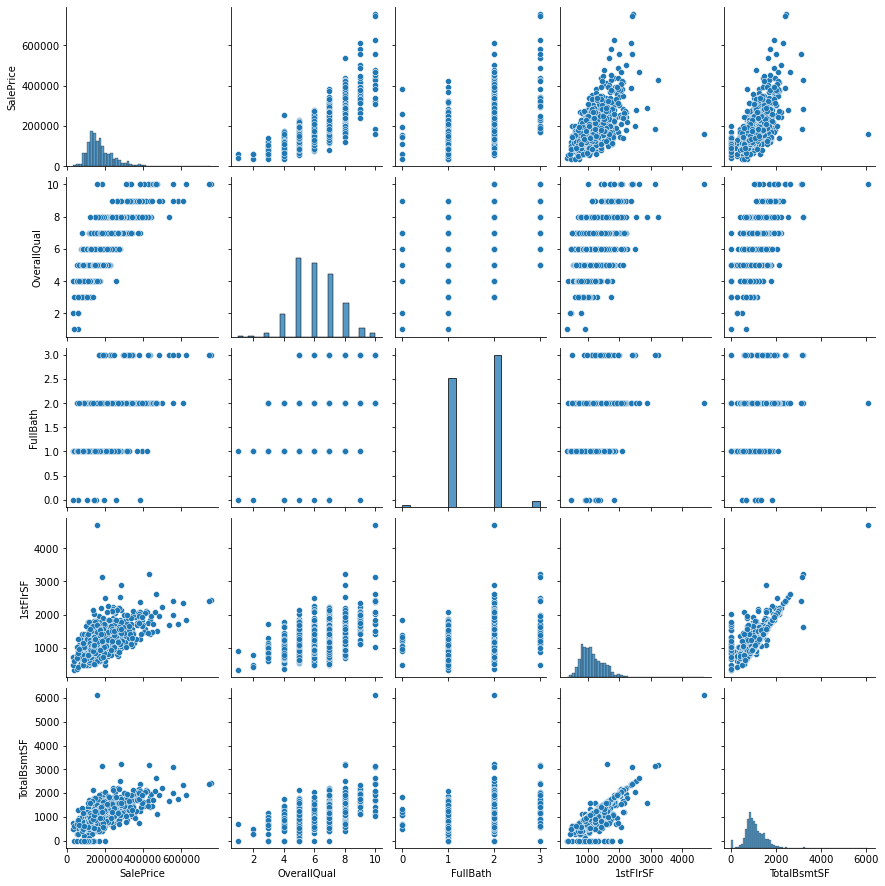

In [36]:
strong_corr_variables = df2[['SalePrice','OverallQual','FullBath','1stFlrSF','TotalBsmtSF']]
sns.pairplot(strong_corr_variables)

By comparing all these 3 variables to the Sale Price variable side by side we can see that they all have a somewhat strong positive correlation and would therefore make strong predictors to determine price in a regression model. 

In [298]:
df3.shape

(1460, 17)

In [299]:
# check for null values in any of the columns of interest
df3.isnull().sum()

SalePrice                     0
LotArea                       0
1stFlrSF                      0
2ndFlrSF                      0
TotalBsmtSF                   0
FullBath                      0
LandContour                   0
Neighborhood                  0
BldgType                      0
OverallQual                   0
OverallCond                   0
YearBuilt                     0
KitchenQual                   0
PoolQC                     1453
First_Floor_Sq_FT_Range       0
Basement_Sq_FT_Range          0
Sales_Price_Range             0
dtype: int64

In [300]:
# since there are 1453 rows with null values for the poolQC I will drop the entire column from the dataset 
df3.shape

df3.drop(['PoolQC'], axis = 1)

(1460, 17)

,SalePrice,LotArea,1stFlrSF,2ndFlrSF,TotalBsmtSF,FullBath,LandContour,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,KitchenQual,First_Floor_Sq_FT_Range,Basement_Sq_FT_Range,Sales_Price_Range
0,208500,8450,856,854,856,2,Lvl,CollgCr,1Fam,7,5,2003,Gd,(835-1335),(501-1001),(124901-214901)
1,181500,9600,1262,0,1262,2,Lvl,Veenker,1Fam,6,8,1976,TA,(835-1335),(1002-1502),(124901-214901)
2,223500,11250,920,866,920,2,Lvl,CollgCr,1Fam,7,5,2001,Gd,(835-1335),(501-1001),(214902-304902)
3,140000,9550,961,756,756,1,Lvl,Crawfor,1Fam,7,5,1915,Gd,(835-1335),(501-1001),(124901-214901)
4,250000,14260,1145,1053,1145,2,Lvl,NoRidge,1Fam,8,5,2000,Gd,(835-1335),(1002-1502),(214902-304902)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,7917,953,694,953,2,Lvl,Gilbert,1Fam,6,5,1999,TA,(835-1335),(501-1001),(124901-214901)
1456,210000,13175,2073,0,1542,2,Lvl,NWAmes,1Fam,6,6,1978,TA,(1837-2337),(1503-2003),(124901-214901)
1457,266500,9042,1188,1152,1152,2,Lvl,Crawfor,1Fam,7,9,1941,Gd,(835-1335),(1002-1502),(214902-304902)
1458,142125,9717,1078,0,1078,1,Lvl,NAmes,1Fam,5,6,1950,Gd,(835-1335),(1002-1502),(124901-214901)


Since there are no null values for any of these rows, next I will remove outliers for the SalePrice variable

In [302]:
percentile25 = strong_corr_variables['SalePrice'].quantile(0.25)
percentile75 = strong_corr_variables['SalePrice'].quantile(0.75)
iqr = percentile75 - percentile25

In [303]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [304]:
strong_corr_variables[strong_corr_variables['SalePrice'] > upper_limit]
strong_corr_variables[strong_corr_variables['SalePrice'] < lower_limit]

,SalePrice,OverallQual,1stFlrSF,TotalBsmtSF
11,345000,9,1182,1175
53,385000,9,1842,1842
58,438780,10,1426,1410
112,383970,7,1282,1264
151,372402,8,1710,1710
...,...,...,...,...
1268,381000,8,1968,728
1353,410000,8,2053,2033
1373,466500,10,2633,2633
1388,377500,9,1746,1746


,SalePrice,OverallQual,1stFlrSF,TotalBsmtSF


In [305]:
df3 = strong_corr_variables[strong_corr_variables['SalePrice']< upper_limit]
df3.shape

(1399, 4)

C:\Users\anari\Documents\Python-Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

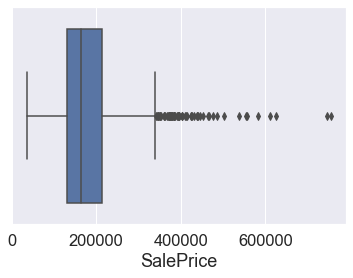

In [306]:
sns.boxplot(strong_corr_variables['SalePrice'])

In [307]:

df3['SalePrice'] = np.where(
    df3['SalePrice'] > upper_limit,
    upper_limit,
    np.where(
        df3['SalePrice'] < lower_limit,
        lower_limit,
        df3['SalePrice']
    )
)

<ipython-input-307-d62e3e5ed6b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['SalePrice'] = np.where(


C:\Users\anari\Documents\Python-Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

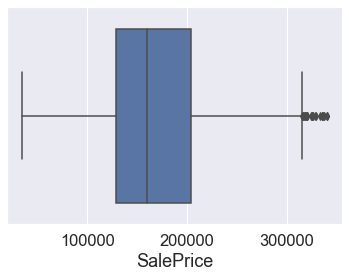

In [308]:
sns.boxplot(df3['SalePrice'])

In [309]:
df3.describe()

,SalePrice,OverallQual,1stFlrSF,TotalBsmtSF
count,1399.000000,1399.000000,1399.000000,1399.000000
mean,170237.127234,5.983560,1132.247320,1024.273767
std,59230.130817,1.282272,357.318243,407.031806
min,34900.000000,1.000000,334.000000,0.000000
25%,129000.000000,5.000000,870.500000,788.000000
50%,159500.000000,6.000000,1069.000000,973.000000
75%,203500.000000,7.000000,1346.500000,1251.500000
max,340000.000000,10.000000,4692.000000,6110.000000


Next I will scale the dependent variable in my dataset

In [310]:
# will separate Sale Price from other variables 
x= df3.drop(['SalePrice'],axis=1) 
y= df3['SalePrice']

In [311]:
from sklearn.preprocessing import MinMaxScaler

mc = MinMaxScaler()

scaled_x= mc.fit_transform(x)

In [317]:
scaled_x

array([[0.66666667, 0.11977972, 0.1400982 ],
       [0.55555556, 0.21294172, 0.20654664],
       [0.66666667, 0.13446535, 0.15057283],
       ...,
       [0.66666667, 0.19596145, 0.18854337],
       [0.44444444, 0.17072051, 0.17643208],
       [0.44444444, 0.21156494, 0.20556465]])

After scaling the data for the dependent variable, our training data is now ready to build a model but for he purposes of this assignment this is not a requirement. 